In [ ]:
#LADI HARISH KUMAR
#20MAI0052
#Deep Learning and its Applications (CSE6037) LAB 

In [ ]:
#Task is to import a data set and apply perceptron and evalue the accuracy of the model

In [2]:
#importing all the reqiuired libraries
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#getting access to google drive for loading data set 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
#loading data set into a data variable
data= pd.read_csv("/content/drive/MyDrive/DATA_SETS/loan.csv")

In [6]:
#viewing 1st five instancess of the data
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


In [7]:
#seeking (no.of instances,no. of features)
data.shape

(10000, 14)

In [13]:
#taking 10th column as the label for the data set
y=data.iloc[:,9].values

In [14]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
data[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [19]:
#adding two new columns at the eend of the data set
data['date_issued_dt'] = pd.to_datetime(data['date_issued'])
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])
data['year']= data['date_issued_dt'].dt.year
data['month']= data['date_issued_dt'].dt.month

In [20]:
#new shape of the data
data.shape

(10000, 18)

In [27]:
#choosing features for applying perceptron
x=data.iloc[:, [0,1,2,7,11,16,17]].values

In [28]:
#splitting into train and test set 20% for testing rest 80% for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =0)

In [30]:
#importing and creating a perceptron model 
from sklearn.linear_model import Perceptron
perceptron_object=Perceptron(random_state=0)

In [36]:
#applying perceptron model on the data set
perceptron_object.fit(x_train,y_train)
perceptron_pred1=perceptron_object.predict(x_test)
perceptron_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
#calculating the accuracy for this model
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,perceptron_pred1)*100

Accuracy score


99.1

In [38]:
#splitting into train and test set 30% for testing rest 70% for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state =50)

In [39]:
#calculating the accuracy for this model
perceptron_object.fit(x_train,y_train)
perceptron_pred2=perceptron_object.predict(x_test)
perceptron_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score
print('Accuracy score')
accuracy_score(y_test,perceptron_pred2)*100

Accuracy score


98.7

[[2961    0]
 [  39    0]]


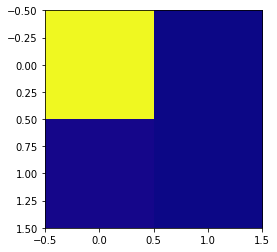

In [47]:
#determining confusion matrix for the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,perceptron_pred2)
plt.imshow(cm, cmap='plasma')


In [48]:
print(cm)

[[2961    0]
 [  39    0]]
